<a href="https://colab.research.google.com/github/USCbiostats/PM520/blob/main/Lab_12_Gibbs_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Gibbs Sampling is a special case of the MCMC family of algorithms. It is widely used to sample from complex joint distributions when direct sampling is intractable but sampling from the conditional distributions is feasible. The algorithm is especially useful in Bayesian inference where one needs to generate samples from the posterior distribution.

## 3.1 Basic Idea

Suppose we wish to sample from a joint probability distribution $ p(x_1, x_2, \ldots, x_n) $. Direct sampling may be infeasible, but if we can easily sample from each conditional distribution:
- $ p(x_1 \mid x_2, \dots, x_n) $
- $ p(x_2 \mid x_1, x_3, \dots, x_n) $
- $ \cdots $
- $ p(x_n \mid x_1, \dots, x_{n-1}) $

then Gibbs Sampling offers a practical solution.

### 3.2 Algorithm Steps

1. **Initialization:** Choose initial values $ x_1^{(0)}, x_2^{(0)}, \dots, x_n^{(0)} $ (often arbitrarily).

2. **Iterative Sampling:** For iteration $ t = 1, 2, \dots, T $:
   - Sample
     $$
     x_1^{(t)} \sim p\Big(x_1 \mid x_2^{(t-1)}, x_3^{(t-1)}, \dots, x_n^{(t-1)}\Big)
     $$
   - Sample
     $$
     x_2^{(t)} \sim p\Big(x_2 \mid x_1^{(t)}, x_3^{(t-1)}, \dots, x_n^{(t-1)}\Big)
     $$
   - Continue in this fashion until
     $$
     x_n^{(t)} \sim p\Big(x_n \mid x_1^{(t)}, x_2^{(t)}, \dots, x_{n-1}^{(t)}\Big)
     $$

3. **Convergence:** Under regularity conditions, the chain $\{(x_1^{(t)}, \dots, x_n^{(t)})\}$ converges to the target distribution $ p(x_1, \dots, x_n) $.

### 3.3 Pseudocode

```python
# Pseudocode for Gibbs Sampling

# Initialize x[1], x[2], ..., x[n]
initialize x = [x_1^(0), x_2^(0), ..., x_n^(0)]

for t in 1 to T:
    x[1] = sample from p(x[1] | x[2]^(t-1), x[3]^(t-1), ..., x[n]^(t-1))
    x[2] = sample from p(x[2] | x[1]^(t),   x[3]^(t-1), ..., x[n]^(t-1))
    ...
    x[n] = sample from p(x[n] | x[1]^(t), x[2]^(t), ..., x[n-1]^(t))
```


## Requirements and Considerations

### 4.1 Markov Chains and Stationarity

- **Markov Property:** The next state depends only on the current state and not on the previous history.
- **Stationary Distribution:** The target distribution $ p(x_1, \dots, x_n) $ is invariant under the Gibbs sampling transition, meaning that once the chain has converged, successive samples are drawn from this distribution.

### 4.2 Detailed Balance and Ergodicity

- **Detailed Balance:** For any two states $ X $ and $ Y $, the transition probabilities satisfy:
  \[
  p(X) \, P(X \to Y) = p(Y) \, P(Y \to X)
  \]
  ensuring that the chain is reversible.
- **Ergodicity:** The chain must be irreducible and aperiodic so that it eventually reaches every part of the state space and the time averages converge to ensemble averages.

### 4.3 Convergence Considerations

- **Burn-in Period:** An initial number of samples may be discarded to allow the chain to reach its stationary distribution.
- **Thinning:** To reduce autocorrelation in the sample chain, one may retain only every $ k $-th sample.
- **Diagnostics:** Use trace plots, autocorrelation functions, or convergence tests (e.g., Gelman–Rubin diagnostics) to assess if the chain has converged.

## 6. Example: Gibbs Sampling for a Bivariate Normal Distribution

To illustrate the method, we consider a simple bivariate normal distribution defined by,
$$
\begin{pmatrix} x \\ y \end{pmatrix} \sim \mathcal{N} \Bigg(\begin{pmatrix} \mu_x \\ \mu_y \end{pmatrix}, \begin{pmatrix} \sigma_x^2 & \rho \sigma_x \sigma_y \\ \rho \sigma_x \sigma_y & \sigma_y^2 \end{pmatrix}\Bigg).
$$

### 6.1 Deriving the Conditional Distributions

For a bivariate normal:
- The conditional distribution for $ x $ given $ y $ is:
  $$
  x \mid y \sim \mathcal{N}\left(\mu_x + \rho \frac{\sigma_x}{\sigma_y}(y - \mu_y),\; (1-\rho^2)\sigma_x^2\right)
  $$
- Likewise, the conditional distribution for $ y $ given $ x $ is:
  $$
  y \mid x \sim \mathcal{N}\left(\mu_y + \rho \frac{\sigma_y}{\sigma_x}(x - \mu_x),\; (1-\rho^2)\sigma_y^2\right)
  $$

# 📘 Conditional Distribution of a Multivariate Normal

Let $\mathbf{X} \sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$ be a $D$-dimensional multivariate normal vector.  
We are interested in deriving the conditional distribution of $X_i$ given all other variables $X_{-i}$.

---

## 1. Partitioning the mean and covariance

Let us partition the mean vector $\boldsymbol{\mu}$ and covariance matrix $\boldsymbol{\Sigma}$ as:

$$
\boldsymbol{\mu} =
\begin{bmatrix}
\mu_i \\
\boldsymbol{\mu}_{-i}
\end{bmatrix},
\quad
\boldsymbol{\Sigma} =
\begin{bmatrix}
\Sigma_{ii} & \boldsymbol{\Sigma}_{i, -i} \\
\boldsymbol{\Sigma}_{-i, i} & \boldsymbol{\Sigma}_{-i, -i}
\end{bmatrix}
$$

Here:
- $\mu_i$ is the mean of $X_i$
- $\boldsymbol{\mu}_{-i}$ is the mean vector of the remaining variables
- $\Sigma_{ii}$ is the variance of $X_i$
- $\boldsymbol{\Sigma}_{i, -i}$ is the row vector of covariances between $X_i$ and $X_{-i}$
- $\boldsymbol{\Sigma}_{-i, -i}$ is the covariance matrix of $X_{-i}$

---

## 2. Conditional Distribution Formula

The conditional distribution of $X_i$ given $X_{-i} = \mathbf{x}_{-i}$ is:

$$
X_i \mid \mathbf{X}_{-i} = \mathbf{x}_{-i} \sim \mathcal{N} \left( \mu_{i \mid -i},\ \sigma^2_{i \mid -i} \right)
$$

Where:

###  Conditional Mean:
$$
\mu_{i \mid -i} = \mu_i + \boldsymbol{\Sigma}_{i, -i} \boldsymbol{\Sigma}_{-i, -i}^{-1} (\mathbf{x}_{-i} - \boldsymbol{\mu}_{-i})
$$

###  Conditional Variance:
$$
\sigma^2_{i \mid -i} = \Sigma_{ii} - \boldsymbol{\Sigma}_{i, -i} \boldsymbol{\Sigma}_{-i, -i}^{-1} \boldsymbol{\Sigma}_{-i, i}
$$

---

## 3.

- The conditional mean $\mu_{i \mid -i}$ is a **linear regression** of $X_i$ on $X_{-i}$
- The conditional variance $\sigma^2_{i \mid -i}$ is the **remaining uncertainty** after accounting for linear dependence

This derivation is a key component of **Gibbs sampling** for multivariate normal distributions, where we sample each $X_i$ conditioned on the rest.

---

##  Summary

For $\mathbf{X} \sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$:

$$
X_i \mid X_{-i} \sim \mathcal{N} \left(
\mu_i + \boldsymbol{\Sigma}_{i, -i} \boldsymbol{\Sigma}_{-i, -i}^{-1} (\mathbf{x}_{-i} - \boldsymbol{\mu}_{-i}),\
\Sigma_{ii} - \boldsymbol{\Sigma}_{i, -i} \boldsymbol{\Sigma}_{-i, -i}^{-1} \boldsymbol{\Sigma}_{-i, i}
\right)
$$


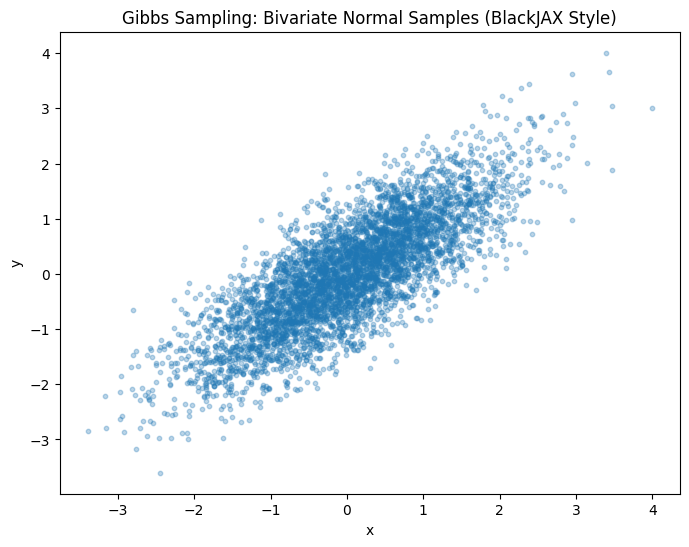

In [7]:
import jax
import jax.numpy as jnp
from jax import random, lax, jit
import matplotlib.pyplot as plt



# Set parameters for the bivariate normal distribution
#  Todo: update to contain D-dimensions

mu_x, mu_y = 0.0, 0.0
sigma_x, sigma_y = 1.0, 1.0
rho = 0.8
n_samples = 5000

def gibbs_step(state, key):
    """
    Performs one Gibbs update step.

    Parameters:
        state: tuple (x, y)
        key: PRNGKey for randomness
    Returns:
        new_state: updated (x, y)
    """
    x, y = state
    # Split the key for independent randomness for each conditional sample
    key_x, key_y = random.split(key)

    # Sample x given y
    mu_cond_x = mu_x + rho * (sigma_x / sigma_y) * (y - mu_y)
    sigma_cond_x = jnp.sqrt((1 - rho**2) * sigma_x**2)
    x_new = mu_cond_x + sigma_cond_x * random.normal(key_x)

    # Sample y given the newly sampled x
    mu_cond_y = mu_y + rho * (sigma_y / sigma_x) * (x_new - mu_x)
    sigma_cond_y = jnp.sqrt((1 - rho**2) * sigma_y**2)
    y_new = mu_cond_y + sigma_cond_y * random.normal(key_y)

    return (x_new, y_new)


def run_gibbs(key, initial_state, n_samples):
    """
    Runs the Gibbs sampler for n_samples iterations using jax.lax.scan.

    Parameters:
        key: PRNGKey for randomness.
        initial_state: tuple (x, y) for initial state.
        n_samples: number of samples to generate.
    Returns:
        states: tuple of arrays (x_samples, y_samples) with shape (n_samples,)
    """
    # Prepare a sequence of keys for the scan
    keys = random.split(key, n_samples)

    def scan_body(state, key):
        new_state = gibbs_step(state, key)
        # The output of scan (new state) is collected; here we also output new_state.
        return new_state, new_state

    final_state, states = lax.scan(scan_body, initial_state, keys)
    return states

# Set up the PRNG key and initial state
seed = 42
key = random.PRNGKey(seed)
initial_state = (0.0, 0.0)

# Run the Gibbs sampler
states = run_gibbs(key, initial_state, n_samples)
x_samples, y_samples = states  # each is a JAX array of shape (n_samples,)

# Transfer arrays from device to host for plotting
x_samples = jax.device_get(x_samples)
y_samples = jax.device_get(y_samples)

# Plot the samples
plt.figure(figsize=(8, 6))
plt.scatter(x_samples, y_samples, alpha=0.3, s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gibbs Sampling: Bivariate Normal Samples (BlackJAX Style)")
plt.show()


## Advantages and Limitations

### Advantages
- **Simplicity:** Straightforward to implement when the full conditional distributions are known.
- **Efficiency:** Can be very effective in high-dimensional settings with conditional independence structures.
- **Theoretical Guarantees:** Under proper conditions, convergence to the target distribution is guaranteed.

### Limitations
- **Slow Mixing:** The chain may mix slowly when variables are strongly correlated.
- **Dependency on Conditionals:** Requires that the conditional distributions are easy to sample from.
- **Curse of Dimensionality:** In cases where the conditionals are high-dimensional or not analytically tractable, alternative methods may be preferred.

Gibbs Sampling:
$$
\mathbf{X}_i \mid \mathbf{X}_{-i} \sim \mathcal{N} \left( \mu_{i \mid -i},\ \sigma^2_{i \mid -i} \right)
$$


Conditional mean:
$$
\mu_{i \mid -i} = \mu_i + \Sigma_{i, -i} \Sigma^{-1}_{-i, -i} (x_{-i} - \mu_{-i})
$$

Conditional variance:
$$
\sigma^2_{i \mid -i} = \Sigma_{ii} - \Sigma_{i, -i} \Sigma^{-1}_{-i, -i} \Sigma_{-i, i}
$$

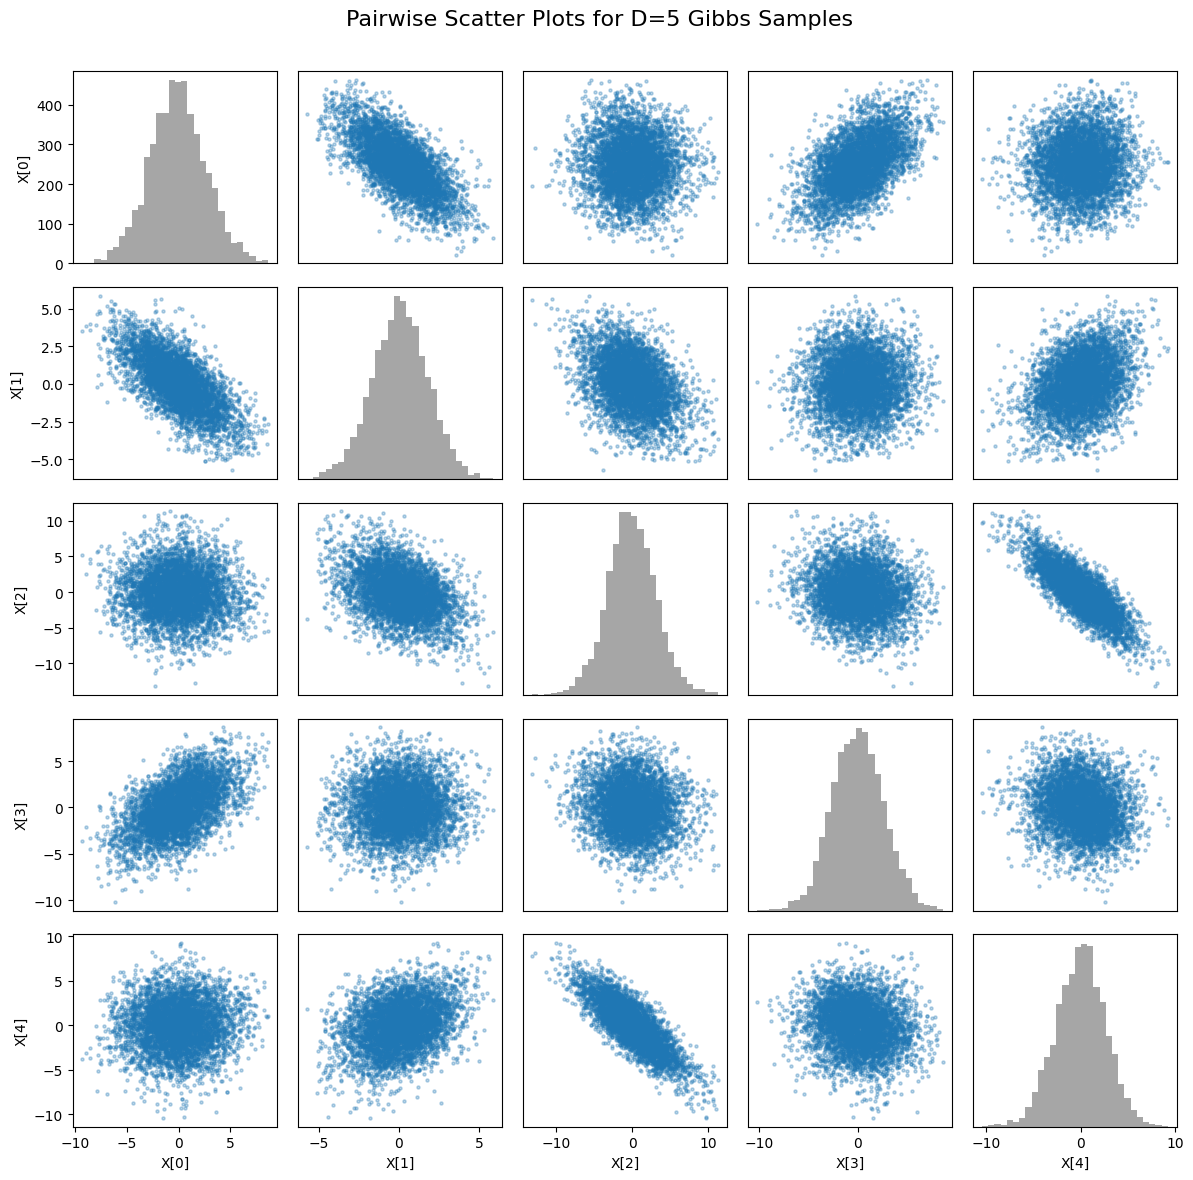

In [33]:
import jax
import jax.numpy as jnp
from jax import random, lax
import matplotlib.pyplot as plt

# Generate a guaranteed positive-definite covariance matrix
D = 5
key = random.PRNGKey(0)
A = random.normal(key, (D, D))
Sigma = A @ A.T + jnp.eye(D) * 0.1
mu = jnp.zeros(D)

n_samples = 5000
burn_in = 500

def conditional_gaussian(i, x, mu, Sigma):
"""
 i is the index of the variable X_i we are currently sampling
 X is the current full vector X=[X_0,... X_D-1]
 mu: the mean vector R^D
 Sigma: the covariance matrix R^DxR^D
"""   # idx build an index array for all dimensions excpet i;
   #  that is -i, the set of variables being conditioned on.
    idx = jnp.array([j for j in range(D) if j != i])
    mu_i = mu[i]  # extract the mean of variable X_i
    mu_rest = mu[idx] ## means of other variables X_-i
    x_rest = x[idx]   ## current values of X_-i
     # extract the relevant parts of the covariance matrix
    Sigma_ii = Sigma[i, i]  ## extract variance of X_i
    Sigma_i_rest = Sigma[i, idx] # covariance of X_i with others (row)
    Sigma_rest_i = Sigma[idx, i] # covariance of others with X_i (columns)
    Sigma_rest_rest = Sigma[jnp.ix_(idx, idx)]  ## covariance among the remaining variables

    Sigma_inv = jnp.linalg.inv(Sigma_rest_rest) # invert the covariance matrix of X_-i

    mu_cond = mu_i + Sigma_i_rest @ Sigma_inv @ (x_rest - mu_rest) # conditional mean
    var_cond = Sigma_ii - Sigma_i_rest @ Sigma_inv @ Sigma_rest_i # conditional variance

    # JAX-safe: Replace invalid variance with small epsilon using jnp.where
    #var_cond = jnp.where(jnp.isnan(var_cond) | (var_cond <= 0), 1e-6, var_cond)

    return mu_cond, jnp.sqrt(var_cond)

def gibbs_step(x, key):
    keys = random.split(key, D)
    x_new = x
    for i in range(D):
        mu_i, std_i = conditional_gaussian(i, x_new, mu, Sigma)
        sample = mu_i + std_i * random.normal(keys[i])
        x_new = x_new.at[i].set(sample)
    return x_new

def run_gibbs(initial_state, keys):
    def scan_fn(x, key):
        x_new = gibbs_step(x, key)
        return x_new, x_new
    _, states = lax.scan(scan_fn, initial_state, keys)
    return states

# Run the sampler
initial_state = jnp.ones(D)
key = random.PRNGKey(42)
keys = random.split(key, n_samples + burn_in)
samples = run_gibbs(initial_state, keys)
samples = jax.device_get(samples[burn_in:])  # remove burn-in

# 2D scatter plots: a grid of scatter plots showing each variable against every other variable
import matplotlib.pyplot as plt

labels = [f'X[{i}]' for i in range(D)]

fig, axes = plt.subplots(D, D, figsize=(12, 12))
for i in range(D):
    for j in range(D):
        ax = axes[i, j]
        if i == j:
            # Diagonal: show histogram
            ax.hist(samples[:, i], bins=30, color='gray', alpha=0.7)
        else:
            # Off-diagonal: scatter plot
            ax.scatter(samples[:, j], samples[:, i], alpha=0.3, s=5)
        if i == D - 1:
            ax.set_xlabel(labels[j])
        else:
            ax.set_xticks([])
        if j == 0:
            ax.set_ylabel(labels[i])
        else:
            ax.set_yticks([])

plt.suptitle(f'Pairwise Scatter Plots for D={D} Gibbs Samples', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


